In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as T
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random

In [2]:
def to_img(x):
    # normalize tensor to [0,1] from [-1,1] for plotting
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    return x

In [3]:
class Conv_Autoencoder(nn.Module):
    def __init__(self):
        super(Conv_Autoencoder,self).__init__()
        self.encoder = nn.Sequential(
            # 32 x 32 x 3
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=5),
            nn.ReLU(),
            # 28 x 28 x 8
            nn.Conv2d(in_channels=8, out_channels=10, kernel_size=5),
            nn.ReLU(),
            # 24 x 24 x 10
            nn.Conv2d(in_channels=10, out_channels=12, kernel_size=5),
            nn.ReLU(),
            # 20 x 20 x 12
            nn.Conv2d(in_channels=12, out_channels=14, kernel_size=5),
            nn.ReLU(),
            nn.Flatten(start_dim=1, end_dim=-1), # flatt starting from channel dimension
            nn.Linear(16*16*14,10),
            nn.Softmax(dim=1)
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(10, 400),
            nn.ReLU(),
            nn.Linear(400, 3584),
            nn.ReLU(),
            nn.Unflatten(1,(14,16,16)), # nn.Unflatten(dimension_to_unflatt, new size)
            nn.ConvTranspose2d(in_channels=14, out_channels=12, kernel_size=5), # giving us tensor of shape (batch, 10, x, x), where 20 = x - 5 + 1 => x=24
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=12, out_channels=10, kernel_size=5), # giving us tensor of shape (batch, 10, x, x), where 24 = x - 5 + 1 => x=28
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=10, out_channels=8, kernel_size=5), # giving us tensor of shape (batch, 10, x, x), where 24 = x - 5 + 1 => x=28
            nn.ReLU(),
            nn.ConvTranspose2d(in_channels=8, out_channels=3, kernel_size=5),  # giving us tensor of shape (batch, 3, 32, 32)
            nn.Tanh()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [4]:
DATASET_CACHE_DIR = './data'
BATCH_SIZE = 128
LR = 0.001
N_EPOCHS = 500
USE_GPU = torch.cuda.is_available()

In [5]:
transforms_val = T.Compose([
    T.ToTensor(),
    T.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])
transforms_train = T.Compose([
    # T.RandomHorizontalFlip(),
    # T.RandomResizedCrop((32, 32), scale=(0.8, 1.0), ratio=(0.9, 1.1)),
    T.ToTensor(),
    T.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5]),
])


train_loader = DataLoader(CIFAR10(root=DATASET_CACHE_DIR, train=True, download=True, transform=transforms_train), batch_size=BATCH_SIZE, shuffle=True, drop_last=True, num_workers=4)
test_loader = DataLoader(CIFAR10(root=DATASET_CACHE_DIR, train=False, download=True, transform=transforms_val), batch_size=BATCH_SIZE, shuffle=False, drop_last=False, num_workers=4)

batch = next(iter(train_loader))
print(torch.max(to_img(batch[0])))
print(torch.min(to_img(batch[0])))


Files already downloaded and verified
Files already downloaded and verified
tensor(1.)
tensor(0.)


Training loss: 0.1539463268640714


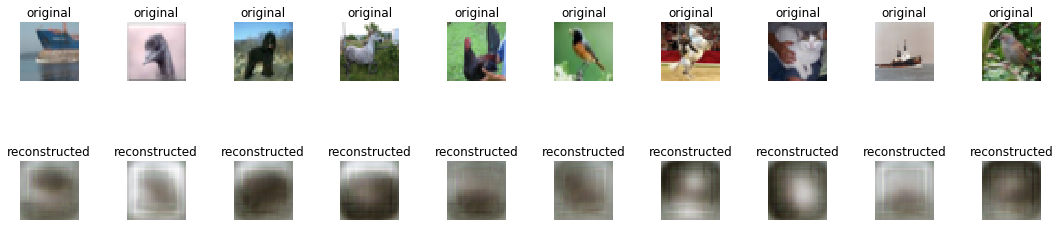

Training loss: 0.10977354880708914
Training loss: 0.10449386443465183
Training loss: 0.10045750368482027
Training loss: 0.09807255271917735
Training loss: 0.09740315056764162
Training loss: 0.09704367925341313
Training loss: 0.0964708125935151
Training loss: 0.09620725457102824
Training loss: 0.09606553654258068


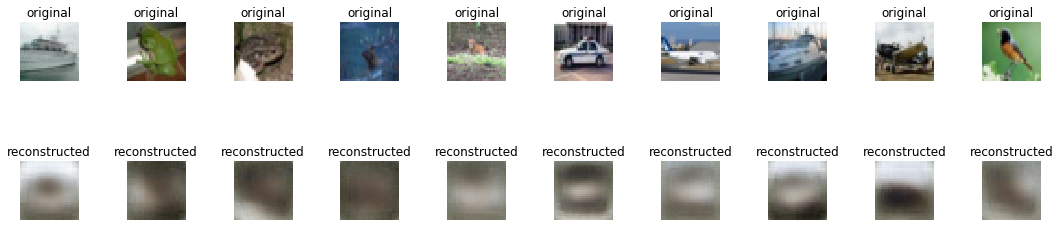

Training loss: 0.09582722542377618
Training loss: 0.09563881439658312
Training loss: 0.09530423356172366
Training loss: 0.09528122563392688
Training loss: 0.09508921223191115
Training loss: 0.0949789927364924
Training loss: 0.09508209872322204
Training loss: 0.09463760910125879
Training loss: 0.0946422852575779
Training loss: 0.09454647338925264


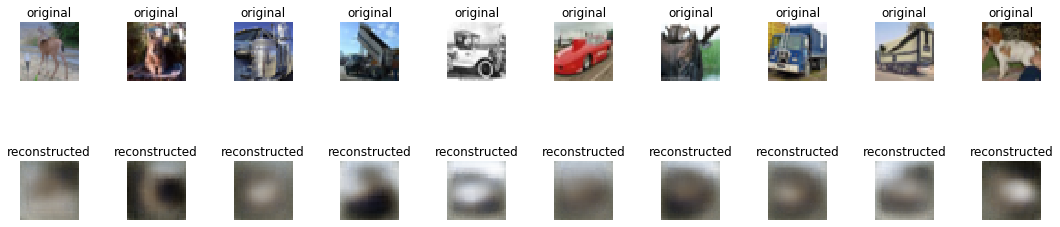

Training loss: 0.09433799454799065
Training loss: 0.09423615000186822
Training loss: 0.09417354153134884
Training loss: 0.09403163433457032
Training loss: 0.0939366553647396
Training loss: 0.09380942831436793
Training loss: 0.09365449796120326
Training loss: 0.09353364421389042
Training loss: 0.09288156550282087
Training loss: 0.09229708675008554


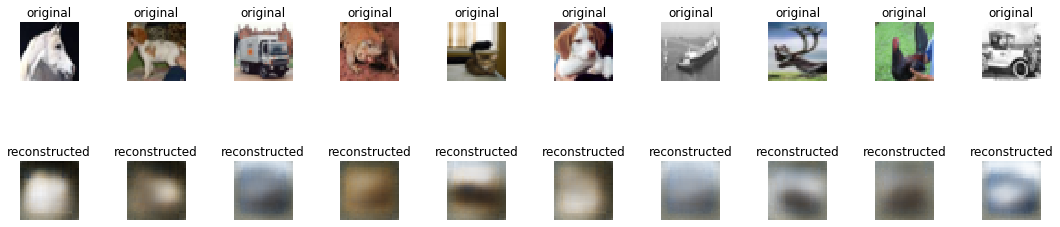

Training loss: 0.0918377629839457
Training loss: 0.09126069369988564
Training loss: 0.0908939339984686
Training loss: 0.09054774871239295
Training loss: 0.08999368615257435
Training loss: 0.08955679568342674
Training loss: 0.08902773570555907
Training loss: 0.08894327573287181
Training loss: 0.08860981135796278
Training loss: 0.08848229984824474


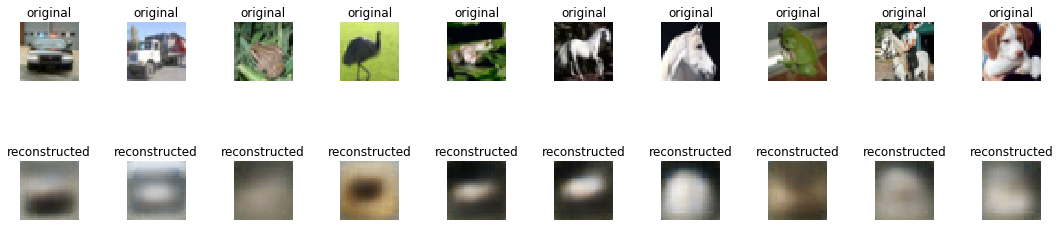

Training loss: 0.08833368097742399
Training loss: 0.08816307909213579
Training loss: 0.08812220728932282
Training loss: 0.0879158273148231
Training loss: 0.08797642313517057
Training loss: 0.08785997781998071
Training loss: 0.08779228144349197
Training loss: 0.08765964381969892
Training loss: 0.08760102660610125
Training loss: 0.08760594257559531


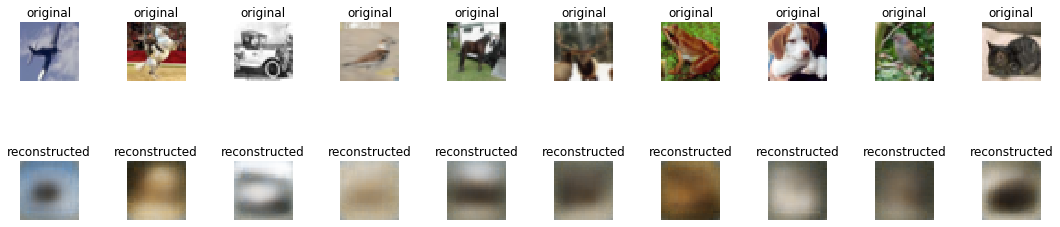

Training loss: 0.08753312289332732
Training loss: 0.0874439534277488
Training loss: 0.08759772332432943
Training loss: 0.0873287771947873
Training loss: 0.08725918456912041
Training loss: 0.08734529580061252
Training loss: 0.08729326713543673
Training loss: 0.08717296752027977
Training loss: 0.08724383793962308
Training loss: 0.08711313429551247


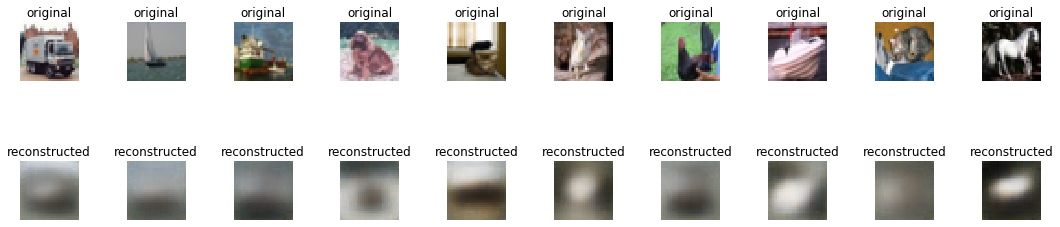

Training loss: 0.08715640742045183
Training loss: 0.08708321175132043
Training loss: 0.08705435542341991
Training loss: 0.08703010009649473
Training loss: 0.08709545788856653
Training loss: 0.08696590478603657
Training loss: 0.08696872727611125
Training loss: 0.08695762361853551
Training loss: 0.0869607629493261
Training loss: 0.08688521809302843


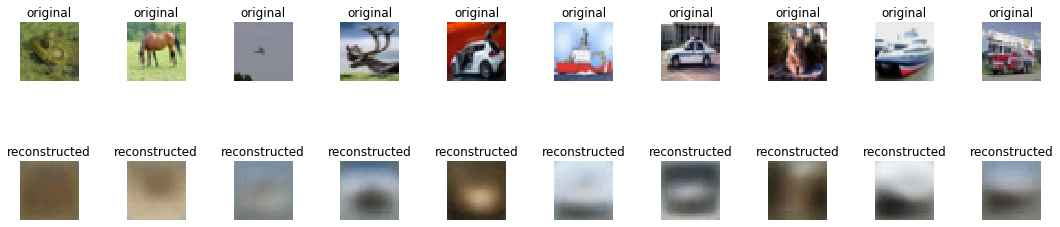

Training loss: 0.08694104216037653
Training loss: 0.08683935035115634
Training loss: 0.08683378883661368
Training loss: 0.08691752220575626
Training loss: 0.086780573733342
Training loss: 0.08705256464771735
Training loss: 0.08664595677684515
Training loss: 0.08673697217152669
Training loss: 0.0867850616383247
Training loss: 0.08676460452186756


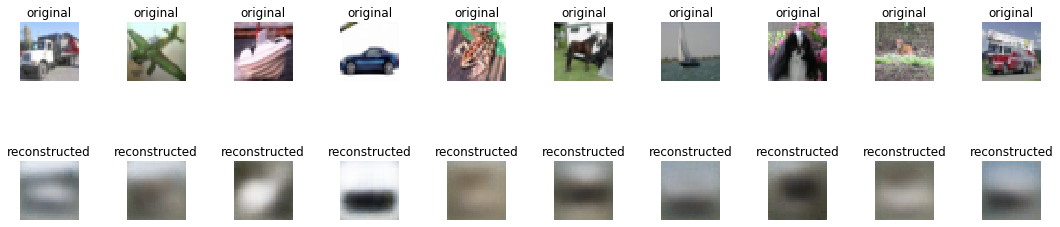

Training loss: 0.0867426288815645
Training loss: 0.08669900855956933
Training loss: 0.08668044471205809
Training loss: 0.08673778921365738
Training loss: 0.08661948253328984
Training loss: 0.08670046327587885
Training loss: 0.08658941269685061
Training loss: 0.08660939066455914
Training loss: 0.08665870141524534
Training loss: 0.0865731305991992


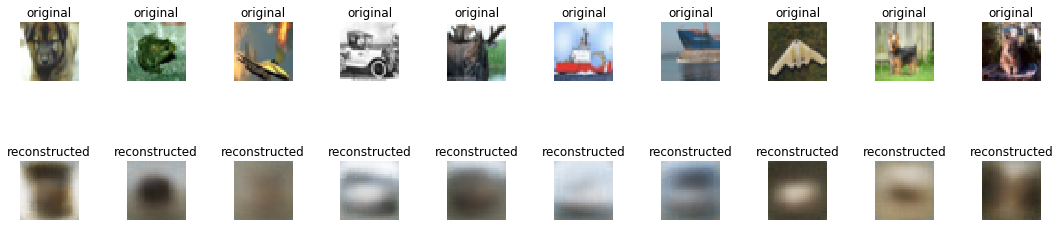

Training loss: 0.08659882839673605
Training loss: 0.08661665488512088
Training loss: 0.0865428198224459
Training loss: 0.08654806535595502
Training loss: 0.08650689791792478
Training loss: 0.08659373485507109
Training loss: 0.08653650243694966
Training loss: 0.08650157873829206
Training loss: 0.08645264494877596
Training loss: 0.08655171705744205


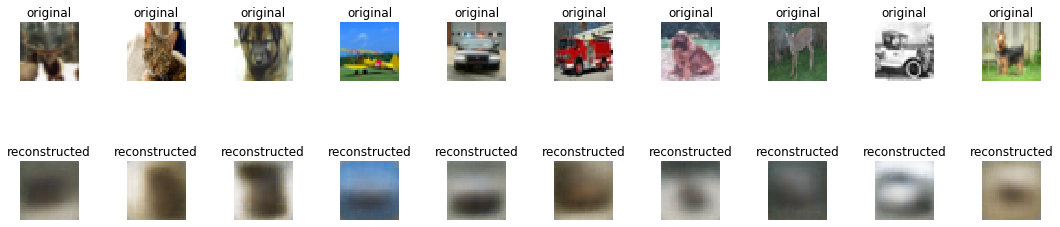

Training loss: 0.0864900151697489
Training loss: 0.08646071595259201
Training loss: 0.08656897781751095
Training loss: 0.08644411435876137
Training loss: 0.08640575672571475
Training loss: 0.08643799890310336
Training loss: 0.08646913734384072
Training loss: 0.08644576540742165
Training loss: 0.08644879538661394
Training loss: 0.0864172009894481


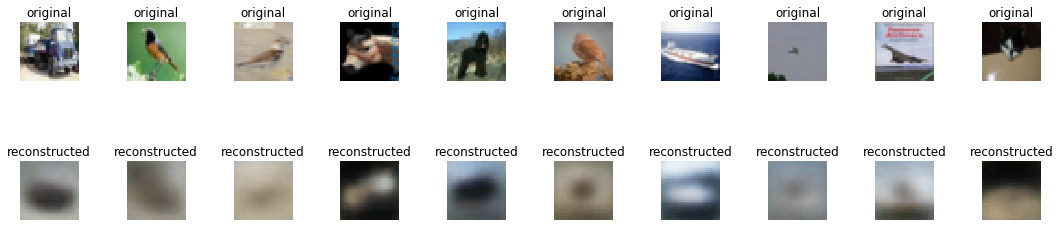

Training loss: 0.0863548745902685
Training loss: 0.08636871438760024
Training loss: 0.0863607457624032
Training loss: 0.08634489270356985
Training loss: 0.08640493746751395
Training loss: 0.08631650727146711
Training loss: 0.0865674852178647
Training loss: 0.08624908287937824
Training loss: 0.08632313534617424
Training loss: 0.08630387687530273


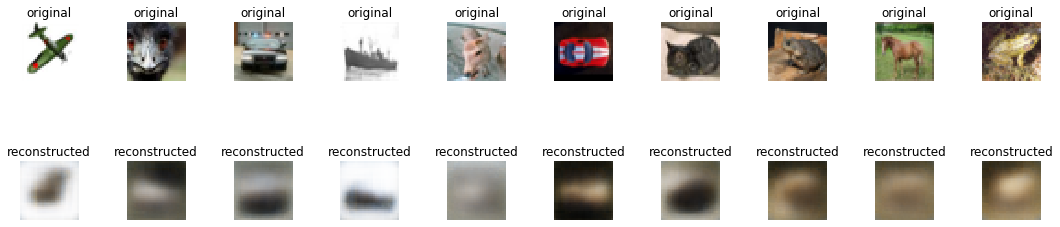

Training loss: 0.086419522552154
Training loss: 0.08628920454245348
Training loss: 0.08627756744241104
Training loss: 0.08630686572346932
Training loss: 0.08629829597014647
Training loss: 0.0862946813305219
Training loss: 0.086341843352868
Training loss: 0.08625965319000757
Training loss: 0.08623257554494418
Training loss: 0.08623553911844889


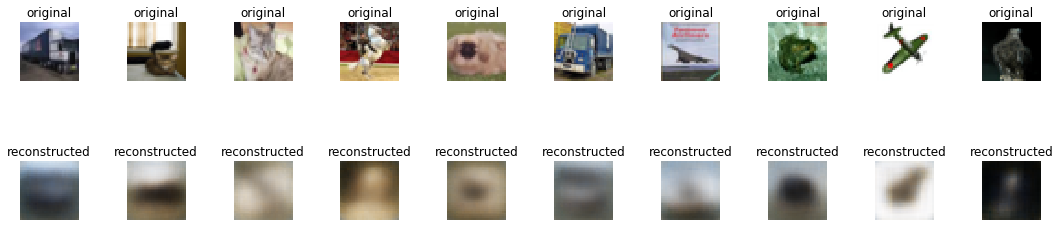

Training loss: 0.08630774405140143
Training loss: 0.08632214164886719
Training loss: 0.08616534639627506
Training loss: 0.08622709701840695
Training loss: 0.08622129794496756
Training loss: 0.08626140422928028
Training loss: 0.08615262770117857
Training loss: 0.08624069098478708
Training loss: 0.08619758536418279
Training loss: 0.08615875826814236


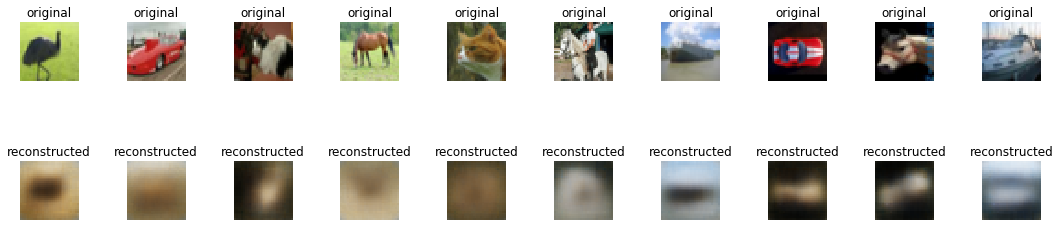

Training loss: 0.08624139135846724
Training loss: 0.08618059651209758
Training loss: 0.08627752885222435
Training loss: 0.08615048544911239
Training loss: 0.08651413604235038
Training loss: 0.08610558563318008
Training loss: 0.08627476879419424
Training loss: 0.08608995458254447
Training loss: 0.0861162903217169
Training loss: 0.08618587425503975


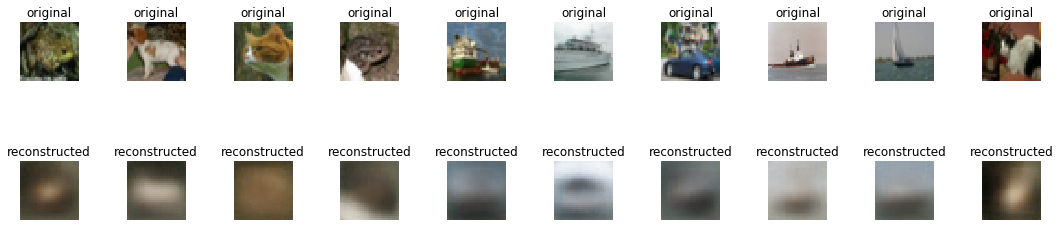

Training loss: 0.08617565855383873
Training loss: 0.0862266005613865
Training loss: 0.08612903711887507
Training loss: 0.08605862880746523
Training loss: 0.08611538715851613
Training loss: 0.08609138406240023
Training loss: 0.08609348799173648
Training loss: 0.08608223079488828
Training loss: 0.08613658236005367
Training loss: 0.08610026838305669


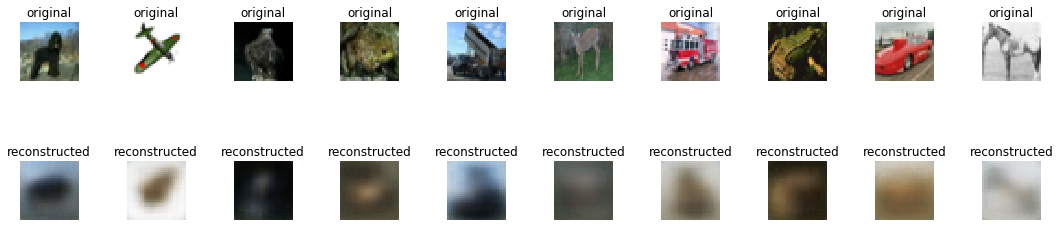

Training loss: 0.08606818539974018
Training loss: 0.08612247082667474
Training loss: 0.08611866732438406
Training loss: 0.08610150445348178
Training loss: 0.08610526665281026
Training loss: 0.08607339241947883
Training loss: 0.08604858542482058
Training loss: 0.08600579230831219
Training loss: 0.08604772260937936
Training loss: 0.08607040997116994


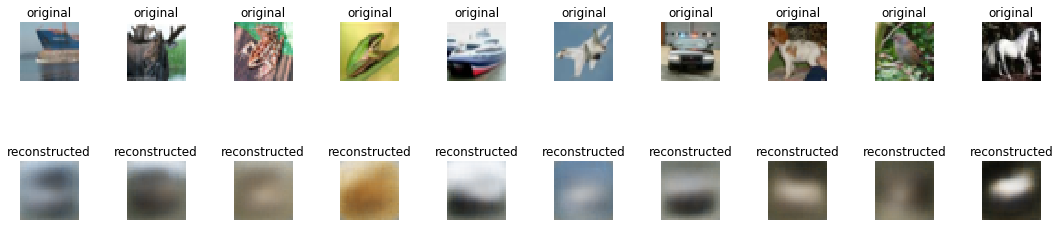

Training loss: 0.08606508756295228
Training loss: 0.08604841297253585
Training loss: 0.08599381395257437
Training loss: 0.08598809265173399
Training loss: 0.08605865532389054
Training loss: 0.08605869561433792
Training loss: 0.08595061435913429
Training loss: 0.08597866403750884
Training loss: 0.0860628204467969
Training loss: 0.08596891027230483


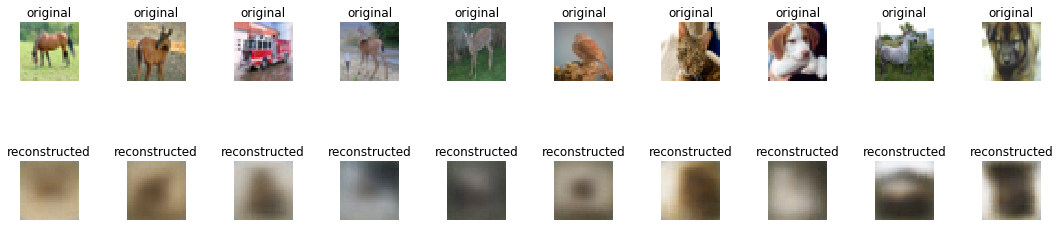

Training loss: 0.0859312925965358
Training loss: 0.08605638933487428
Training loss: 0.08600924599629182
Training loss: 0.08602303488132282
Training loss: 0.0859492207566897
Training loss: 0.08598040674741451
Training loss: 0.08604835233627221
Training loss: 0.08596802040552481
Training loss: 0.08596588354080151
Training loss: 0.08595579715493398


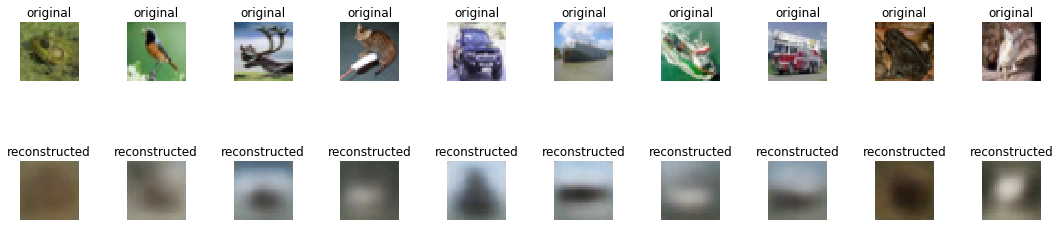

Training loss: 0.08599431300774599
Training loss: 0.08596404334291434
Training loss: 0.08596687662677888
Training loss: 0.08597551284310145
Training loss: 0.08596347245650414
Training loss: 0.08603763861151842
Training loss: 0.08586594519706872
Training loss: 0.08595033563100375
Training loss: 0.08594513692152805
Training loss: 0.08595440674286622


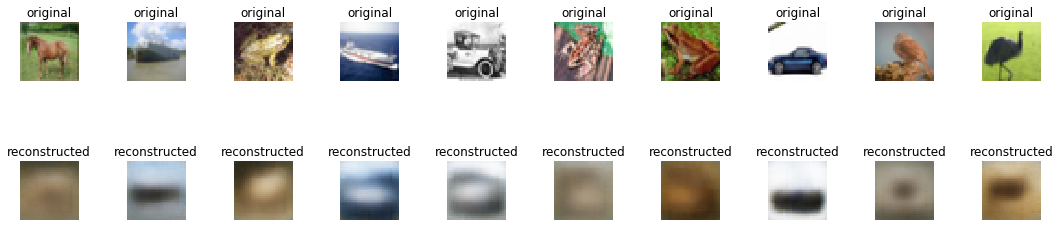

Training loss: 0.08588900797260113
Training loss: 0.08587466325515355
Training loss: 0.08592061224656228
Training loss: 0.08592625010089996
Training loss: 0.08591591156063935
Training loss: 0.08585776455509357
Training loss: 0.08592867858898945
Training loss: 0.08594912107174213
Training loss: 0.0858534832795461
Training loss: 0.08592041071790915


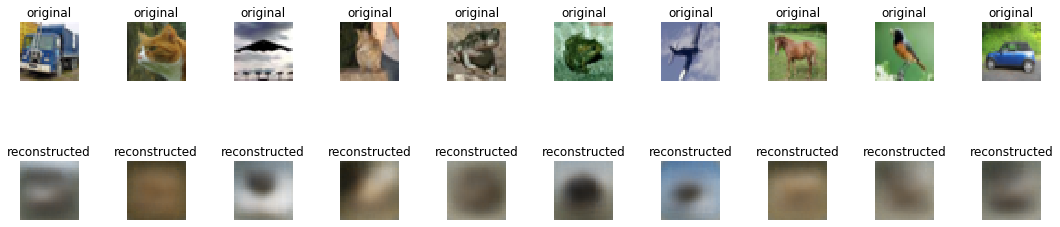

Training loss: 0.08590925366450579
Training loss: 0.0858339725014491
Training loss: 0.08590713515877724
Training loss: 0.08591903109963124
Training loss: 0.08585759408963033
Training loss: 0.08585548590009029
Training loss: 0.0858622323626127
Training loss: 0.08592593356584892
Training loss: 0.08584994096786548
Training loss: 0.08587559813108199


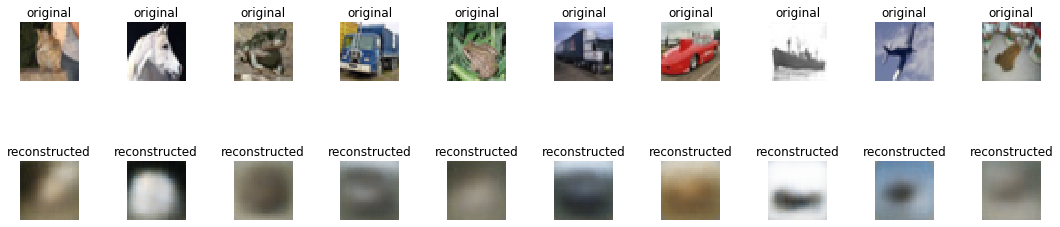

Training loss: 0.08595648098450441
Training loss: 0.08583204706127827
Training loss: 0.0858705396262499
Training loss: 0.08582838874978897
Training loss: 0.08583333519024727
Training loss: 0.08588384924790798
Training loss: 0.08586732053603881
Training loss: 0.08585258815915156
Training loss: 0.08584405304147646
Training loss: 0.08584299540290466


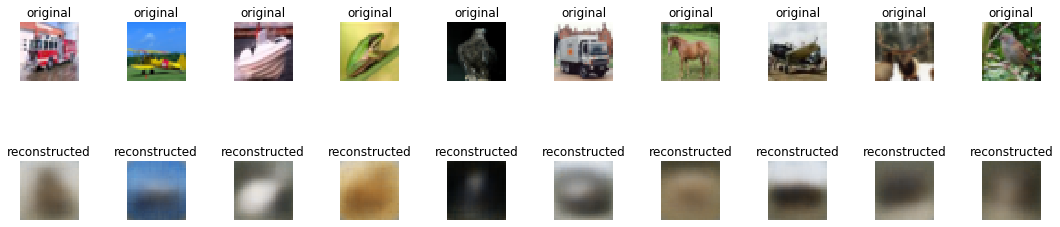

Training loss: 0.08583070005361851
Training loss: 0.08584342232117285
Training loss: 0.08579629688308789
Training loss: 0.08585499137257918
Training loss: 0.08584091479961689
Training loss: 0.0858489233522843
Training loss: 0.08586408058420206
Training loss: 0.08585744788631415
Training loss: 0.08576991661236837
Training loss: 0.08579558458847877


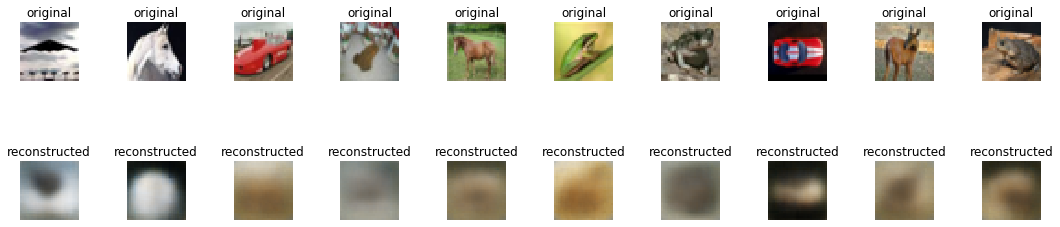

Training loss: 0.0858004266061844
Training loss: 0.08583276281372094
Training loss: 0.08585279801717172
Training loss: 0.0857878120854879
Training loss: 0.08583396829855748
Training loss: 0.08575497036560988
Training loss: 0.08582691779503455
Training loss: 0.08584844242685881
Training loss: 0.08579604232158416
Training loss: 0.08584374563816266


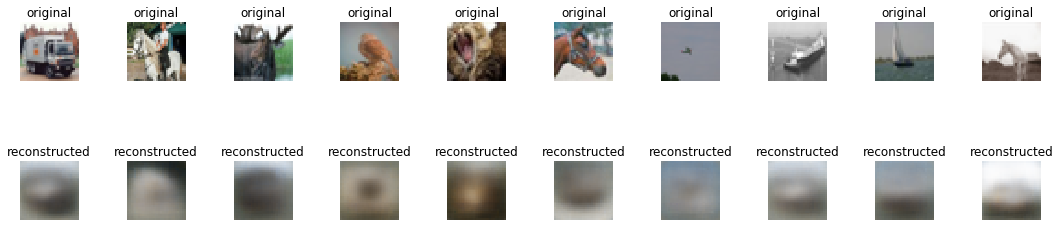

Training loss: 0.08573350701958705
Training loss: 0.08578217728779866
Training loss: 0.0858179138830075
Training loss: 0.08584516560420012
Training loss: 0.08575849735584014
Training loss: 0.08578206686637341
Training loss: 0.08580874042251171
Training loss: 0.08572765672818208
Training loss: 0.08581054254602163
Training loss: 0.085744197647541


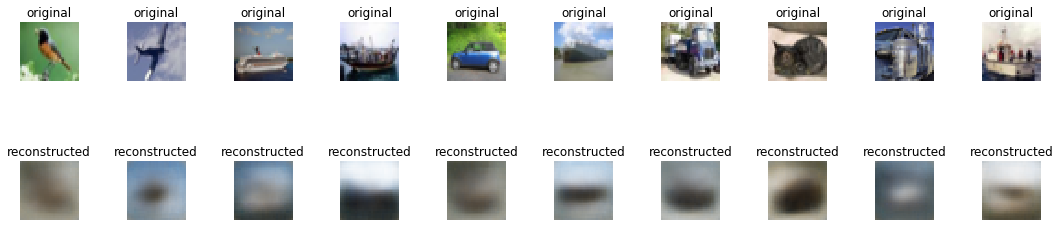

Training loss: 0.08578928957382838
Training loss: 0.08571796734363604
Training loss: 0.08582309593374912
Training loss: 0.08579208936828833
Training loss: 0.08571836633177904
Training loss: 0.08581724938673851
Training loss: 0.0857267620280767
Training loss: 0.08576606227419316
Training loss: 0.08577638409840754
Training loss: 0.08573721051216125


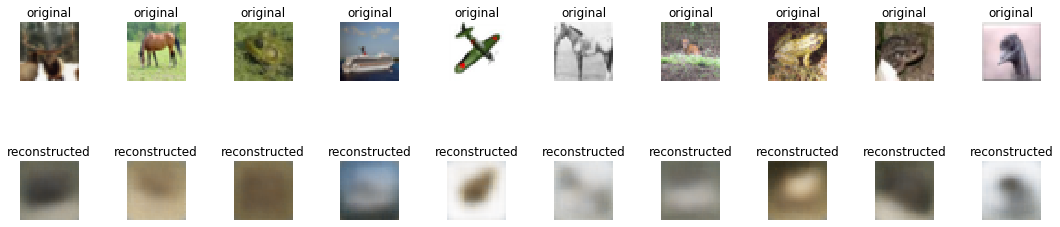

Training loss: 0.08580919221425667
Training loss: 0.08571597589896275
Training loss: 0.08567315573111559
Training loss: 0.08580163031434401
Training loss: 0.08583714295274172
Training loss: 0.08562452147404352
Training loss: 0.08571927895148596
Training loss: 0.08576409979126393
Training loss: 0.0857593861145851
Training loss: 0.08576484956802466


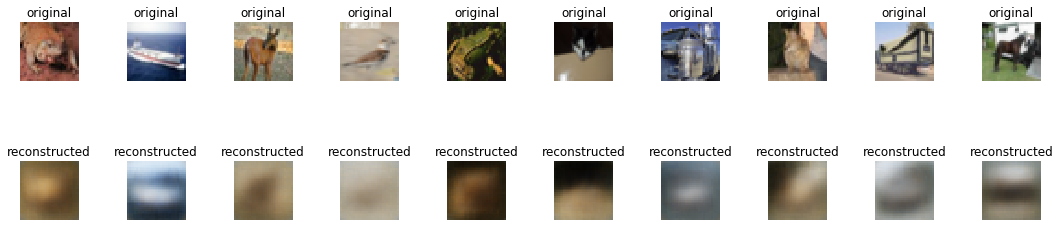

Training loss: 0.08570487720844074
Training loss: 0.08572711199522018
Training loss: 0.08574634054914498
Training loss: 0.08569597089901948
Training loss: 0.0857012496353724
Training loss: 0.08567377323141465
Training loss: 0.08573682216497568
Training loss: 0.08577911481261254
Training loss: 0.08572429773899225
Training loss: 0.08569740849809769


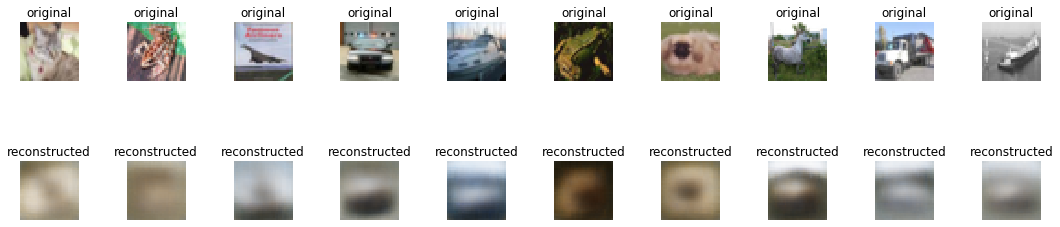

Training loss: 0.08576666011642187
Training loss: 0.08573966154303306
Training loss: 0.08570237868489364
Training loss: 0.08568573594093323
Training loss: 0.08567686319733277
Training loss: 0.08569438659991974
Training loss: 0.08573349016981247
Training loss: 0.08572751553012775
Training loss: 0.0857559031400925
Training loss: 0.08570651362339655


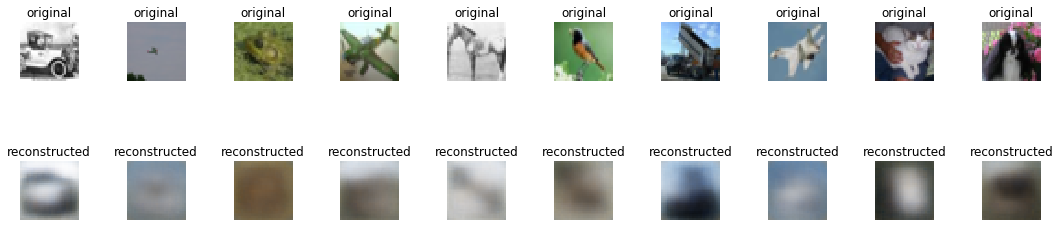

Training loss: 0.08566549563637146
Training loss: 0.08568814713985493
Training loss: 0.08573531938286928
Training loss: 0.08570664710341355
Training loss: 0.08568616767342274
Training loss: 0.08570284155698923
Training loss: 0.0856323642608447
Training loss: 0.08572399194041888
Training loss: 0.08559930114409862
Training loss: 0.08570661050004837


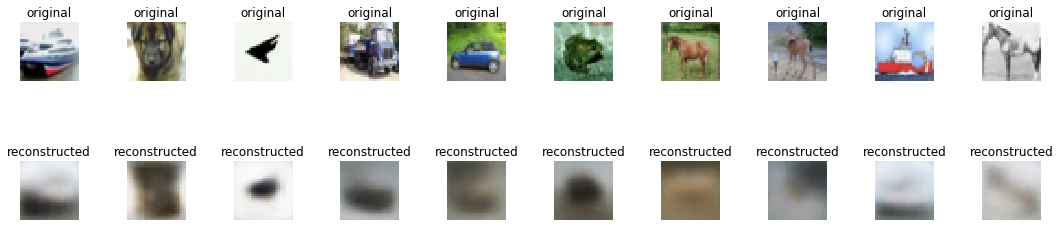

Training loss: 0.08568210531121645
Training loss: 0.08575628201166789
Training loss: 0.08560324020874806
Training loss: 0.0857284722610926
Training loss: 0.08561917176613441
Training loss: 0.08571445850225595
Training loss: 0.08573409028542348
Training loss: 0.08562448082061914
Training loss: 0.08563717597952256
Training loss: 0.08565481754067616


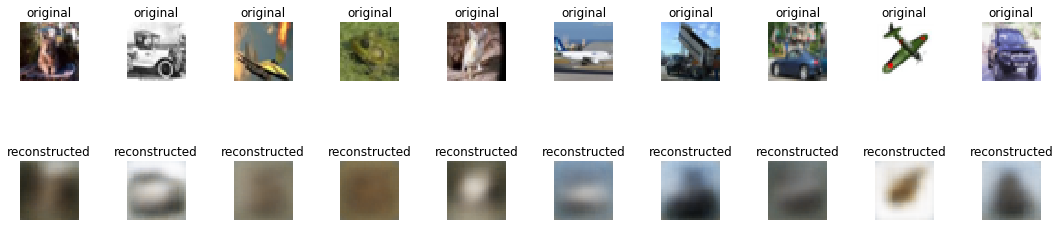

Training loss: 0.08604886394280653
Training loss: 0.0856041937493361
Training loss: 0.08561325965401453
Training loss: 0.08563092883962851
Training loss: 0.08561301863728425
Training loss: 0.08570466249799118
Training loss: 0.08571375062068304
Training loss: 0.08563459911025488
Training loss: 0.08562344931639158
Training loss: 0.08571356743192061


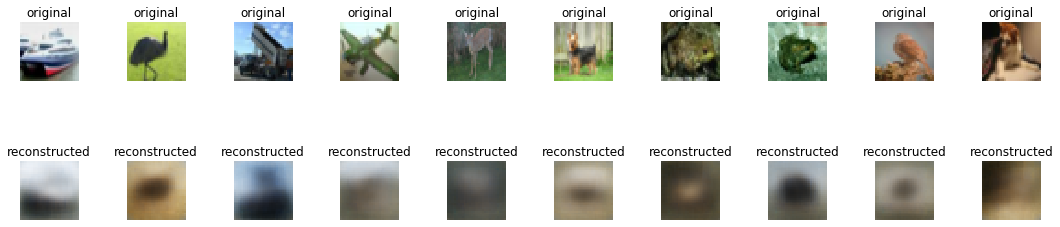

Training loss: 0.0856474155607896
Training loss: 0.08565090833566127
Training loss: 0.08566448973157467
Training loss: 0.08563744987432774
Training loss: 0.08561874570754859
Training loss: 0.08564066256468113
Training loss: 0.08565297356018653
Training loss: 0.08562229999747031
Training loss: 0.08572874672901937
Training loss: 0.08561756484783613


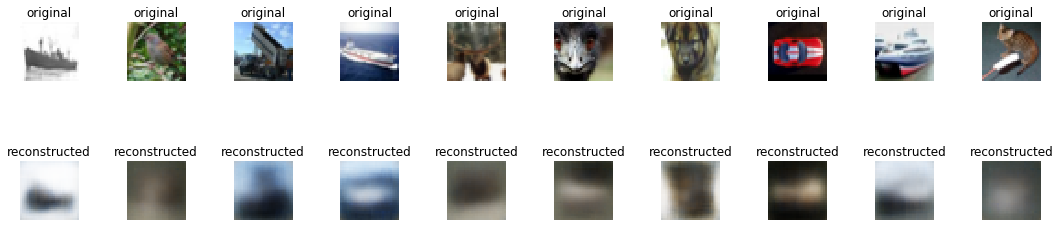

Training loss: 0.08566070583004218
Training loss: 0.08560821114060206
Training loss: 0.08563925795830213
Training loss: 0.08562072800138058
Training loss: 0.08566547953165495
Training loss: 0.0855581361704912
Training loss: 0.08563125935884622
Training loss: 0.08567243600502993
Training loss: 0.0855677743943838
Training loss: 0.08566559822513507


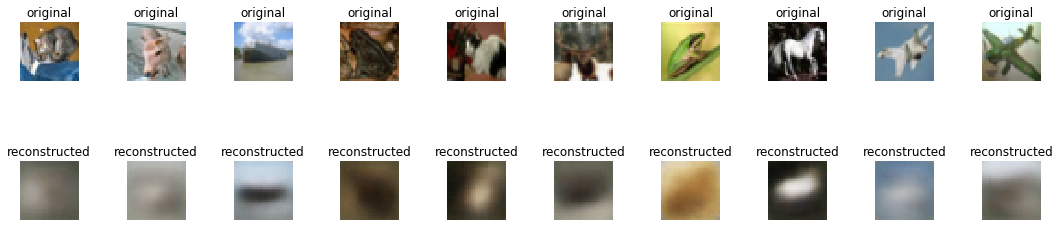

Training loss: 0.08561010738978019
Training loss: 0.08560427301205122
Training loss: 0.08566241008348954
Training loss: 0.08560790499815574
Training loss: 0.08564757712376424
Training loss: 0.08562440919952514
Training loss: 0.08555469256945146
Training loss: 0.08564009039829938
Training loss: 0.08563126501364586
Training loss: 0.08565559918299699


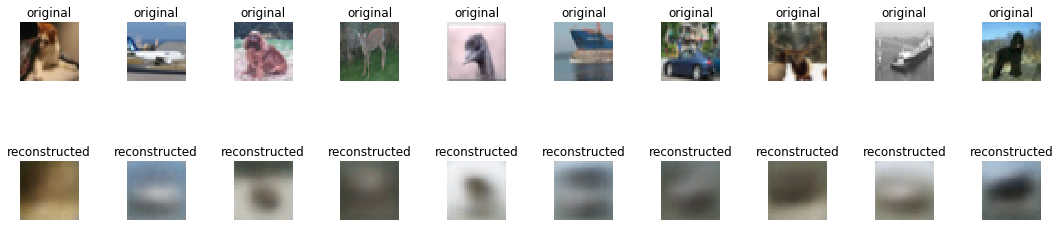

Training loss: 0.08556772063557919
Training loss: 0.08563542089019066
Training loss: 0.08559903405033625
Training loss: 0.08552116887309612
Training loss: 0.08565993712116511
Training loss: 0.08555858574616604
Training loss: 0.08554665515056023
Training loss: 0.08565105618192599
Training loss: 0.08550646402514898
Training loss: 0.08583693471856606


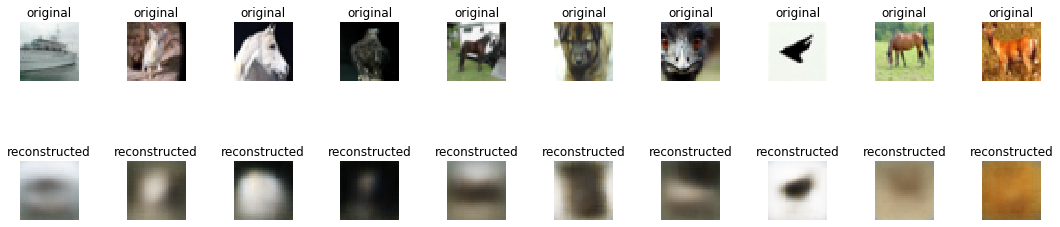

Training loss: 0.08551408776488059
Training loss: 0.08559328115139252
Training loss: 0.0855920846072527
Training loss: 0.0856194077202907
Training loss: 0.08558186693833425
Training loss: 0.08557687751375712
Training loss: 0.0856440177712685
Training loss: 0.08558147834279599
Training loss: 0.08554065628693654
Training loss: 0.08558917100995014


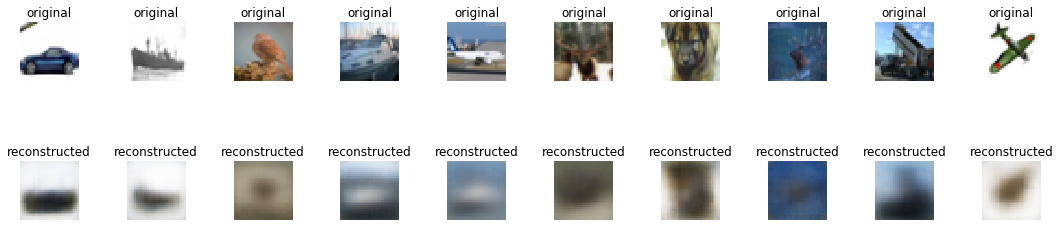

Training loss: 0.08562929209990379
Training loss: 0.08557989543829209
Training loss: 0.08550865447674043
Training loss: 0.08562747199948018
Training loss: 0.08556246887414884
Training loss: 0.08556492779499446
Training loss: 0.08559493558147015
Training loss: 0.08556476657589276
Training loss: 0.08561235775168126
Training loss: 0.08555677242768117


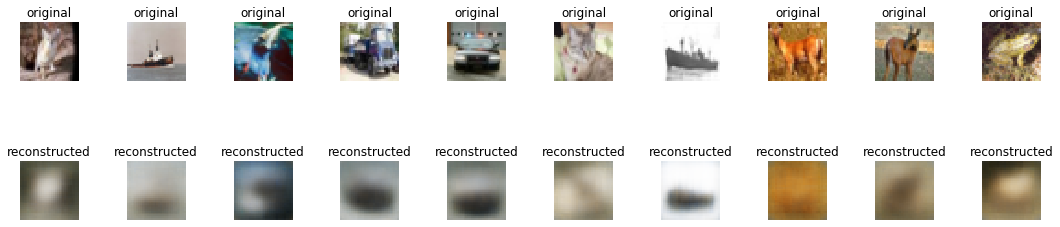

Training loss: 0.08556057048531679
Training loss: 0.08558797956659243
Training loss: 0.08554431163729766
Training loss: 0.0855559990192071
Training loss: 0.08558214889504971
Training loss: 0.08547425919618362
Training loss: 0.0855620584044701
Training loss: 0.085572933138181
Training loss: 0.08554516478608816
Training loss: 0.08555259184959607


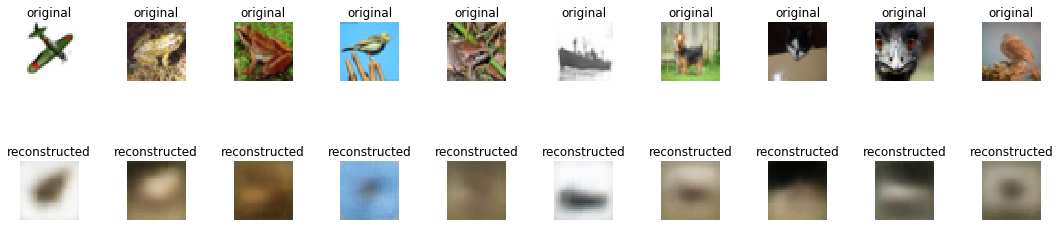

Training loss: 0.08555420912229098
Training loss: 0.08556701563871824
Training loss: 0.08554219278769615
Training loss: 0.085582507841098
Training loss: 0.08557031935988328
Training loss: 0.08550597872489538
Training loss: 0.08555537334237344
Training loss: 0.0855163700114458
Training loss: 0.08555367567982429
Training loss: 0.08552604898428305


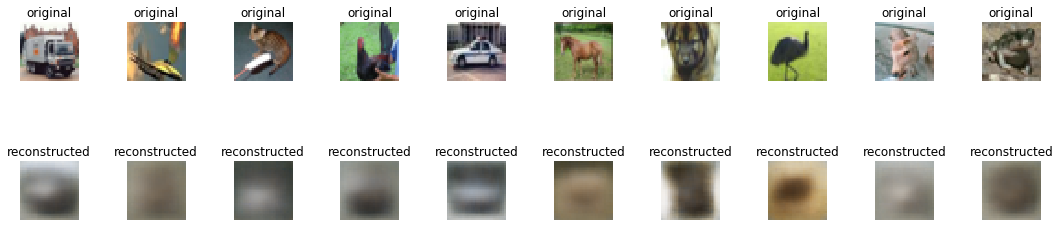

Training loss: 0.08554054622848829
Training loss: 0.08549663218168112
Training loss: 0.08558334769346775
Training loss: 0.08552002347050569
Training loss: 0.08555431358325176
Training loss: 0.08549235566304281
Training loss: 0.08556481800400294
Training loss: 0.08557330985099841
Training loss: 0.08555262310382647
Training loss: 0.08560156447765155


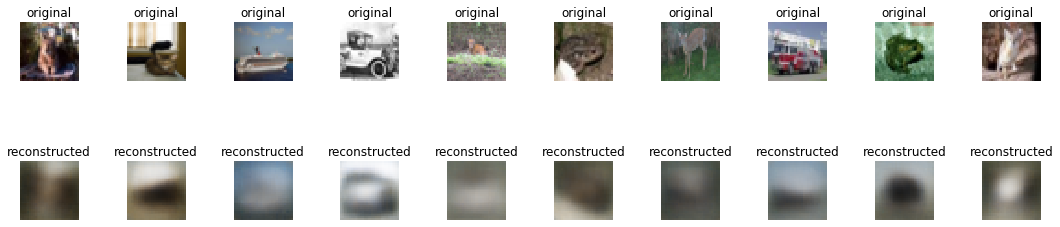

Training loss: 0.08554488708957647
Training loss: 0.08549097560537167
Training loss: 0.08550055731947605
Training loss: 0.08551071683565775
Training loss: 0.08555056212040094
Training loss: 0.08551117311685513
Training loss: 0.08556459549909982
Training loss: 0.08546485516887445
Training loss: 0.08555457431536455
Training loss: 0.08548111661504476


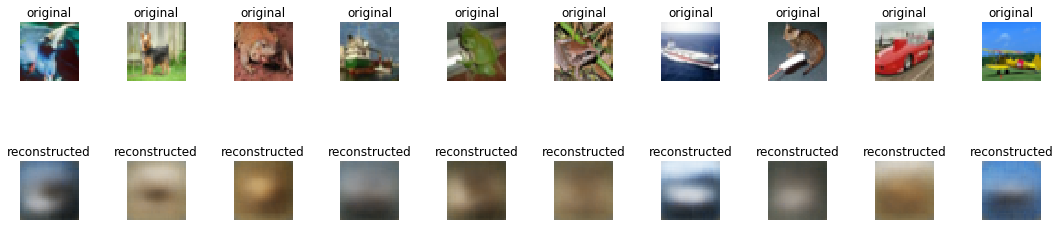

Training loss: 0.08554428999240582
Training loss: 0.08546721365971444
Training loss: 0.08547949538781092
Training loss: 0.08549732139859444
Training loss: 0.08555480996385599
Training loss: 0.08548470817697354
Training loss: 0.08551265318424274
Training loss: 0.08543898293223136
Training loss: 0.08558241468973649
Training loss: 0.08546302150457333


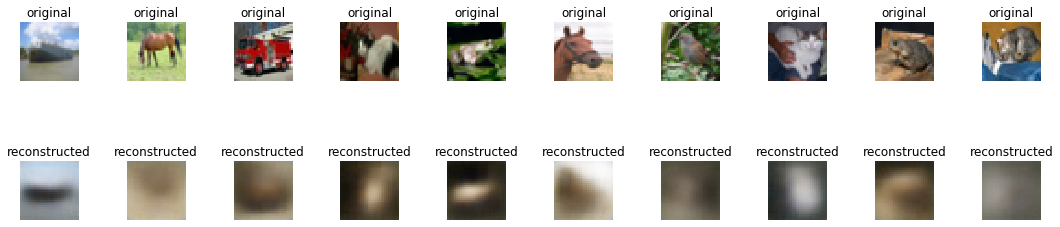

Training loss: 0.08546936261730316
Training loss: 0.0855172034448538
Training loss: 0.08555132972124295
Training loss: 0.08546451633939377
Training loss: 0.08556672061483066
Training loss: 0.08553448617458344
Training loss: 0.08545488675053303
Training loss: 0.08552831537448442
Training loss: 0.08544299965485548
Training loss: 0.0855081405586157


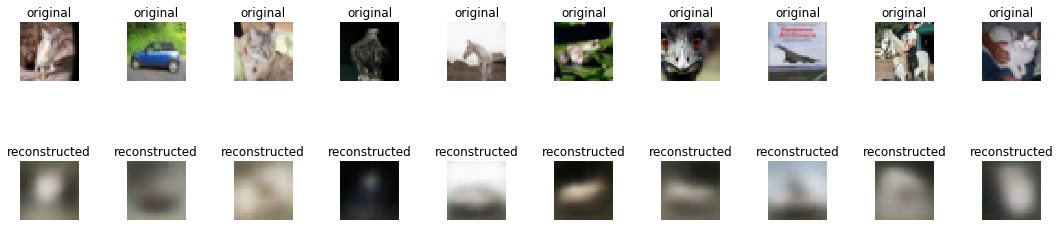

Training loss: 0.08548641898311102
Training loss: 0.08548506362698018
Training loss: 0.08551966628203025
Training loss: 0.08548448486970021
Training loss: 0.08545561746144906
Training loss: 0.08550448794013414
Training loss: 0.08548363993565242
Training loss: 0.08548632871646147
Training loss: 0.08557481614825053
Training loss: 0.08545866165405665


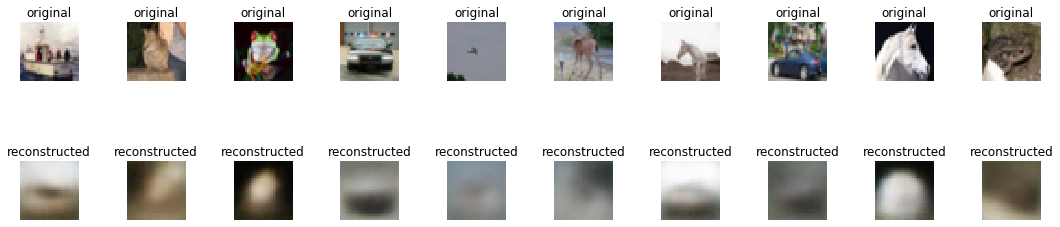

Training loss: 0.08545046049432876
Training loss: 0.08542123616505892
Training loss: 0.08552659092805324
Training loss: 0.08548585657890026
Training loss: 0.08545147960002605
Training loss: 0.08552975018437092
Training loss: 0.0854403201968242
Training loss: 0.08553019467836771
Training loss: 0.08544526430658805
Training loss: 0.08548759653782233


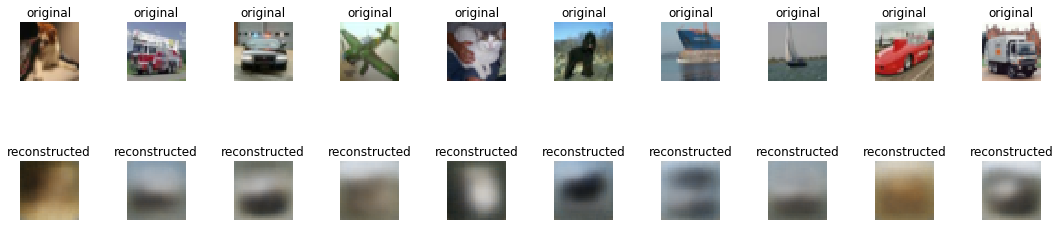

Training loss: 0.08543358825338193
Training loss: 0.08549606270897082
Training loss: 0.08565121329365633
Training loss: 0.08539122440494024
Training loss: 0.08543732559833771
Training loss: 0.08544525909118163
Training loss: 0.0854589180686535
Training loss: 0.08546670344777596
Training loss: 0.08547316806820723
Training loss: 0.08550930158832135


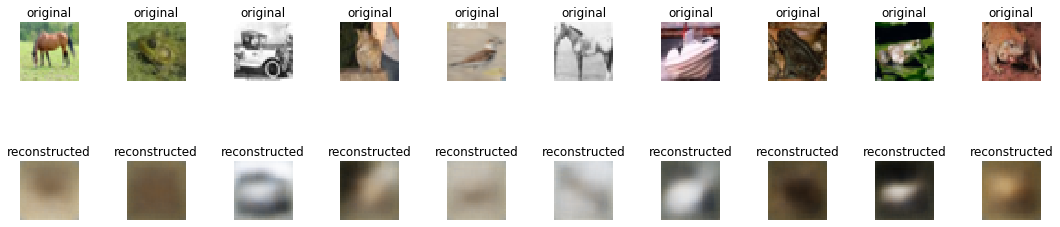

Training loss: 0.08544869929169997
Training loss: 0.08549608897704344
Training loss: 0.08540533618667187
Training loss: 0.08545025141957478
Training loss: 0.0854558639228344
Training loss: 0.08543027870548077
Training loss: 0.08549560262606694
Training loss: 0.0854512801919228
Training loss: 0.08549459905196459
Training loss: 0.08544591351961478


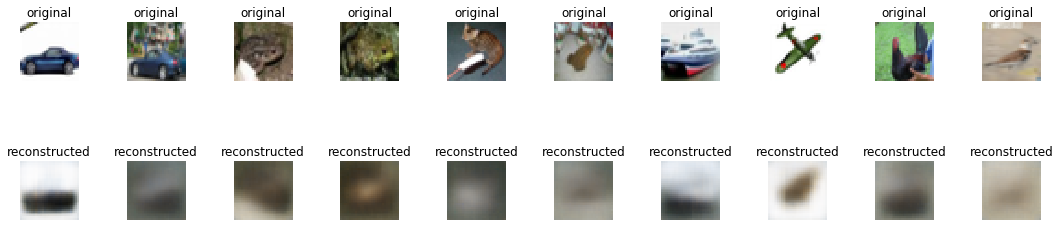

Training loss: 0.0854571365011044
Training loss: 0.08546077234622759
Training loss: 0.085417424619962
Training loss: 0.08546110091683193
Training loss: 0.08543258122144601
Training loss: 0.08547087716750609
Training loss: 0.08541571310697457
Training loss: 0.08543790859671739
Training loss: 0.0854580741471205
Training loss: 0.08542680085087434


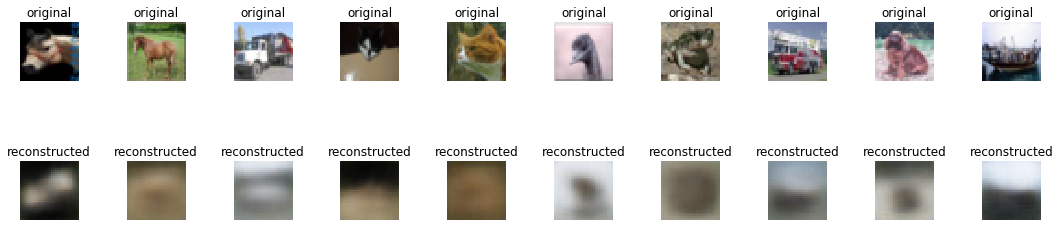

In [6]:

autoencoder = Conv_Autoencoder()

# TUTORIAL: always choose adam first -> then check if perfomcance is bad,e.g. loss jumps randomly because of momentum (momentum could be bad for some landscapes)-> try to take other optimizer (based on loss landscape different optimizer are better)
optimizer =  torch.optim.Adam(autoencoder.parameters(), lr=LR, weight_decay=1e-5)


criterion =  nn.MSELoss() # TUTORIAL: we could also use another loss here, perceptual loss for example (so if MSE Loss leads to bad results maybe change it)

if USE_GPU:
    autoencoder.cuda()
    criterion.cuda()

for epoch in range(N_EPOCHS):
    autoencoder.train()
    losses = []
    for (X, _) in train_loader:
        if USE_GPU:
            X = X.cuda()
        
        optimizer.zero_grad()
        
    
        reconstruction = autoencoder(X)
        
        loss = criterion(X, reconstruction)
        
        loss.backward()

        losses = np.append(losses, loss.item())

        optimizer.step()

    autoencoder.eval()

    # print loss of train set
    print('Training loss: {}'.format(np.mean(losses)))

    # evaluation on test set 
    if ((epoch+1) % 10) == 0 or epoch == 0:
        X_test, _ = next(iter(test_loader))
        if USE_GPU:
            X_test = X_test.cuda()

        with torch.no_grad():
            reconstruction_test = autoencoder(X_test)

        loss = criterion(X_test, reconstruction_test)
        print('Test loss: {}'.format(loss), file=open('/dev/stdout', 'w'))

        # normalize to [0,1] for plotting
        X_test = to_img(X_test)
        reconstruction_test = to_img(reconstruction_test)
    
        # show some random images as well as some fixed images to may better see the progress
        fig, ax = plt.subplots(2, 10)
        fig.set_figwidth(15)
        fig.tight_layout()
        ax = ax.flatten()
        for i, index in enumerate(random.sample(range(len(X_test)),10)):
            img = X_test[index].cpu().numpy() # show noisy input for denoising autoencoder
            img_rec = reconstruction_test[index].cpu().numpy()
            ax[i].imshow(img.transpose(1,2,0))
            ax[i+10].imshow(img_rec.transpose(1,2,0))
            ax[i].set_title(f'original')
            ax[i+10].set_title(f'reconstructed')
            ax[i].set_axis_off()
            ax[i+10].set_axis_off()
        plt.show()